In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [8]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

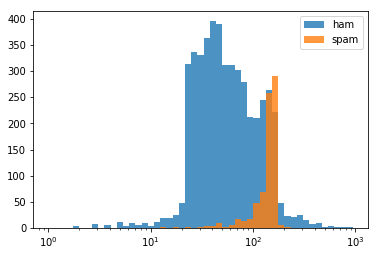

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

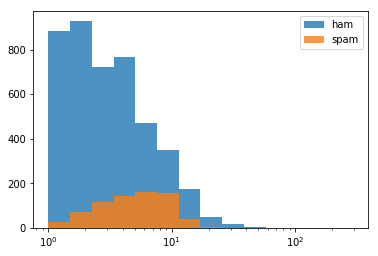

In [11]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df[['length','punct']]
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
X_train.shape

(3900, 2)

In [15]:
X_test.shape

(1672, 2)

In [16]:
y_test.shape

(1672,)

In [18]:
y_train.shape

(3900,)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr_model=LogisticRegression()

In [21]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
from sklearn import metrics

In [24]:
predictions=lr_model.predict(X_test)

In [25]:
metrics.confusion_matrix(y_test,predictions)

array([[1405,   43],
       [ 219,    5]], dtype=int64)

In [26]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1405,43
spam,219,5


In [28]:
print(metrics.classification_report(y_test,predictions))

             precision    recall  f1-score   support

        ham       0.87      0.97      0.91      1448
       spam       0.10      0.02      0.04       224

avg / total       0.76      0.84      0.80      1672



In [29]:
metrics.accuracy_score(y_test,predictions)

0.8433014354066986

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
nb_model=MultinomialNB()

In [32]:
nb_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
predictions=nb_model.predict(X_test)

In [34]:
print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [35]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


In [36]:
print(metrics.classification_report(y_test,predictions))

             precision    recall  f1-score   support

        ham       0.87      0.99      0.92      1448
       spam       0.00      0.00      0.00       224

avg / total       0.75      0.86      0.80      1672

